DB Scan - Density based spatial clustering of application with noise

outlier- jo data ka point hota hai buut grp se belong nhi karta hai

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split



In [27]:
df= pd.read_csv('Mall_Customers.csv')
df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [28]:
X=df.iloc[:, [3, 4]].values

In [29]:
X=StandardScaler().fit_transform(X)

In [30]:
dbscan=DBSCAN(eps=0.5, min_samples=5)# eps= Neighbourhood radius : how close two points must be in the same cluster 
labels=dbscan.fit_predict(X)    #min_samples = Minimum number of points neended to form a cluster

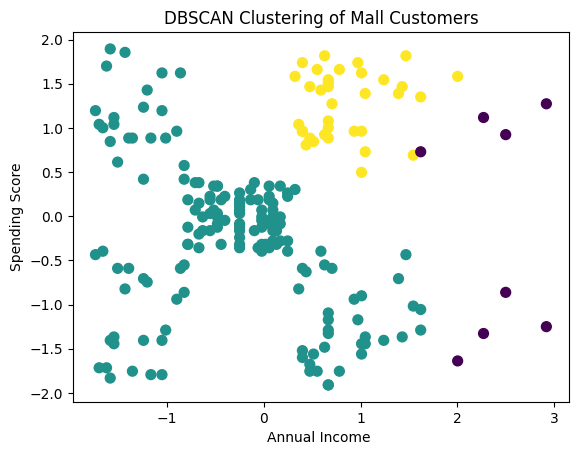

In [31]:
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis',s=50)
plt.title('DBSCAN Clustering of Mall Customers')
plt.xlabel('Annual Income ')
plt.ylabel('Spending Score')
plt.show()

In [32]:
# Finding outliers 
outliers = X[labels == -1]
print(f"Number of outliers detected:, {len(outliers)}")

Number of outliers detected:, 8


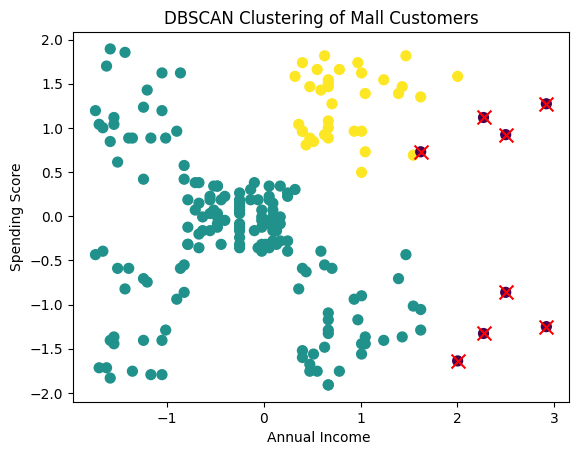

In [33]:
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis',s=50)
plt.scatter(outliers[:, 0], outliers[:, 1], color='red', s=100, label='Outliers',marker='x')
plt.title('DBSCAN Clustering of Mall Customers')
plt.xlabel('Annual Income ')
plt.ylabel('Spending Score')
plt.show()

silhouette score - used hota hai dbscan mai  accuracy score pata karne ke liye 
- jiski value 1 ke pass hoti hai to utna acha hota hai

In [34]:
from sklearn.metrics import silhouette_score

In [35]:
score=silhouette_score(X, labels)
print("silhouette Score:", score)

silhouette Score: 0.35044619989666004
